# load dataset

In [1]:
import datasets
from xsum_dataset import XsumDataset

In [2]:
xsum_data_raw = datasets.load_dataset("xsum")

Using custom data configuration default
Reusing dataset xsum (/home/wk247/.cache/huggingface/datasets/xsum/default/1.2.0/32c23220eadddb1149b16ed2e9430a05293768cfffbdfd151058697d4c11f934)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
# train/val/test data
# xsum_train_data = XsumDataset(xsum_data_raw["train"])
xsum_val_data = XsumDataset(xsum_data_raw["validation"])
xsum_test_data = XsumDataset(xsum_data_raw["test"])

# load log probs

In [4]:
import config as cfg
from utils import load_from_cache_dir, save_to_cache_dir, calculate_KL
from os.path import join

In [5]:
gen_method = "beam"
num_seqs = 30

In [7]:
insert_num_options = cfg.insert_num_options
insert_1_options = cfg.insert_1_options
insert_2_options = cfg.insert_2_options

In [8]:
log_probs_cache_dir = join(cfg.log_probs_dir, f"{gen_method}_{num_seqs}")

In [9]:
original_log_probs_list = load_from_cache_dir("original_log_probs_list", log_probs_cache_dir)
ptb_log_probs_list_insert_1_random = load_from_cache_dir("ptb_log_probs_list_insert_1_random", log_probs_cache_dir)
ptb_log_probs_list_insert_1_top1 = load_from_cache_dir("ptb_log_probs_list_insert_1_top1", log_probs_cache_dir)
ptb_log_probs_list_insert_2_random = load_from_cache_dir("ptb_log_probs_list_insert_2_random", log_probs_cache_dir)
ptb_log_probs_list_insert_2_topbottom = load_from_cache_dir("ptb_log_probs_list_insert_2_topbottom", log_probs_cache_dir)
ptb_log_probs_list_insert_2_top2 = load_from_cache_dir("ptb_log_probs_list_insert_2_top2", log_probs_cache_dir)

ptb_log_probs_list_ner = load_from_cache_dir(f"ptb_log_probs_list_ner_{cfg.ner_tagger}", log_probs_cache_dir)

'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/original_log_probs_list.pkl' loaded
'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/ptb_log_probs_list_insert_1_random.pkl' loaded
'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/ptb_log_probs_list_insert_1_top1.pkl' loaded
'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/ptb_log_probs_list_insert_2_random.pkl' loaded
'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/ptb_log_probs_list_insert_2_topbottom.pkl' loaded
'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/ptb_log_probs_list_insert_2_top2.pkl' loaded
'/home/wk247/workspace/xsum_analysis/cache/log_probs/beam_30/ptb_log_probs_list_ner_trf.pkl' loaded


In [10]:
len(original_log_probs_list) == len(ptb_log_probs_list_insert_1_random) \
== len(ptb_log_probs_list_insert_1_top1) == len(ptb_log_probs_list_insert_2_random) \
== len(ptb_log_probs_list_insert_2_topbottom) == len(ptb_log_probs_list_ner)

True

# compute KL

In [11]:
import torch
import numpy as np
from typing import List

In [12]:
insert_1_random_KL = calculate_KL(original_log_probs_list, ptb_log_probs_list_insert_1_random)
insert_1_top1_KL = calculate_KL(original_log_probs_list, ptb_log_probs_list_insert_1_top1)
insert_2_random_KL = calculate_KL(original_log_probs_list, ptb_log_probs_list_insert_2_random)
insert_2_topbottom_KL = calculate_KL(original_log_probs_list, ptb_log_probs_list_insert_2_topbottom)
insert_2_top2_KL = calculate_KL(original_log_probs_list, ptb_log_probs_list_insert_2_top2)

ner_KL = calculate_KL(original_log_probs_list, ptb_log_probs_list_ner)

In [13]:
def get_stats(array):
    return np.nanmean(array), np.nanmedian(array), np.nanstd(array)

In [14]:
insert_1_random_KL_mean, insert_1_random_KL_median, insert_1_random_KL_std = get_stats(insert_1_random_KL)
insert_1_top1_KL_mean, insert_1_top1_KL_median, insert_1_top1_KL_std = get_stats(insert_1_top1_KL)
insert_2_random_KL_mean, insert_2_random_KL_median, insert_2_random_KL_std = get_stats(insert_2_random_KL)
insert_2_top2_KL_mean, insert_2_top2_KL_median, insert_2_top2_KL_std = get_stats(insert_2_top2_KL)
insert_2_topbottom_KL_mean, insert_2_topbottom_KL_median, insert_2_topbottom_KL_std = get_stats(insert_2_topbottom_KL)

ner_KL_mean, ner_KL_median, ner_KL_std = get_stats(ner_KL)

* insert 1

In [15]:
print("insert 1 sentencence into the top of the document "\
      f"mean:{insert_1_top1_KL_mean:.3f}, " \
      f"median:{insert_1_top1_KL_median:.3f}, " \
      f"std:{insert_1_top1_KL_std:.3f}")

insert 1 sentencence into the top of the document mean:5.007, median:4.146, std:3.962


In [16]:
print("insert 1 sentencence into the random position of the document "\
      f"mean:{insert_1_random_KL_mean:.3f}, " \
      f"median:{insert_1_random_KL_median:.3f}, " \
      f"std:{insert_1_random_KL_std:.3f}")

insert 1 sentencence into the random position of the document mean:2.107, median:0.818, std:3.102


* insert 2

In [17]:
print("insert 2 sentencences into the top and bottom of the document "\
      f"mean:{insert_2_topbottom_KL_mean:.3f}, " \
      f"median:{insert_2_topbottom_KL_median:.3f}, " \
      f"std:{insert_2_topbottom_KL_std:.3f}")

insert 2 sentencences into the top and bottom of the document mean:5.704, median:4.726, std:4.387


In [18]:
print("insert 2 sentencences into the top of the document "\
      f"mean:{insert_2_top2_KL_mean:.3f}, " \
      f"median:{insert_2_top2_KL_median:.3f}, " \
      f"std:{insert_2_top2_KL_std:.3f}")

insert 2 sentencences into the top of the document mean:7.273, median:6.280, std:5.005


In [19]:
print("insert 2 sentencences into the random positions of the document "\
      f"mean:{insert_2_random_KL_mean:.3f}, " \
      f"median:{insert_2_random_KL_median:.3f}, " \
      f"std:{insert_2_random_KL_std:.3f}")

insert 2 sentencences into the random positions of the document mean:3.634, median:2.172, std:4.164


* ner

In [20]:
print("replace named entity of the document "\
      f"mean:{ner_KL_mean:.3f}, " \
      f"median:{ner_KL_median:.3f}, " \
      f"std:{ner_KL_std:.3f}")

replace named entity of the document mean:7.003, median:5.021, std:6.939


# visualize

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Create lists for the plot
x_s = ['Insert1_random','Insert1_top', 'Insert2_random', 'Insert2_top', 'Insert2_top_bottom', 'Named_entity']
x_pos = np.arange(len(x_s))
means = [insert_1_random_KL_mean, 
         insert_1_top1_KL_mean, 
         insert_2_random_KL_mean,
         insert_2_top2_KL_mean, 
         insert_2_topbottom_KL_mean, 
         ner_KL_mean]
medians = [insert_1_random_KL_median, 
           insert_1_top1_KL_median, 
           insert_2_random_KL_median, 
           insert_2_top2_KL_median, 
           insert_2_topbottom_KL_median, 
           ner_KL_median]
stds = [insert_1_random_KL_std, 
        insert_1_top1_KL_std, 
        insert_2_random_KL_std, 
        insert_2_top2_KL_std, 
        insert_2_topbottom_KL_mean, 
        ner_KL_std]

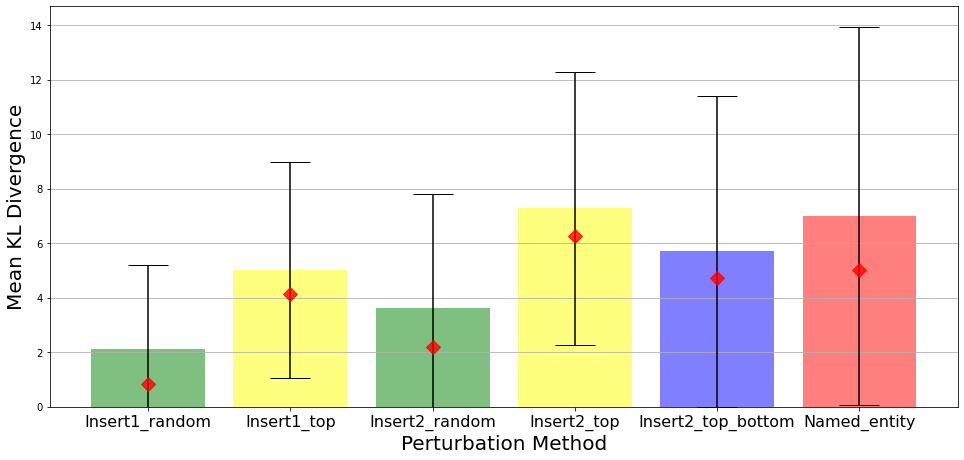

In [25]:
# Build the plot
fig, ax = plt.subplots()
fig.set_size_inches(13.5, 6.5)
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=20,
      color=['green', 'yellow', 'green', 'yellow', 'blue', 'red'])

ax.set_ylabel('Mean KL Divergence', fontsize=20)
ax.set_xlabel('Perturbation Method', fontsize=20)

ax.set_xticks(x_pos)
ax.set_xticklabels(x_s, fontsize=16)
ax.yaxis.grid(True)
plt.ylim(bottom=0)

# add median markers
plt.plot(x_pos, medians, marker="D", linestyle="", alpha=0.8, color="red", markersize=10)

# Save the figure and show
plt.tight_layout()
plt.savefig('./vis/kl_mean_std.png')
plt.show()

# groupby ner

In [27]:
# load ent pool dict
ent_pool_dict = load_from_cache_dir("val_test_ent_pool_dict", join(cfg.ner_dir, cfg.ner_tagger))

'/home/wk247/workspace/xsum_analysis/cache/ner/trf/val_test_ent_pool_dict.pkl' loaded


In [32]:
# load ner ptb docs list
ner_ptb_docs_dir = join(cfg.ptb_docs_dir, "ner")
ner_ptb_docs_list = load_from_cache_dir(f"ptb_docs_list_{cfg.ner_tagger}", ner_ptb_docs_dir)

'/home/wk247/workspace/xsum_analysis/cache/ptb_docs/ner/ptb_docs_list_trf.pkl' loaded


### check one sample

In [34]:
idx = 2

In [35]:
print("* chosen_ent:", ner_ptb_docs_list[idx]["metadata"]["chosen_ent"])
print("* replace_ent:", ner_ptb_docs_list[idx]["metadata"]["replace_ent"])
print("* ptb_document:", ner_ptb_docs_list[idx]["ptb_doc"])
print("* ptb_true_summary:", ner_ptb_docs_list[idx]["ptb_true_summary"])

* chosen_ent: Facebook
* replace_ent: The Foreign and Commonwealth Office
* ptb_document: Jordan Hill, Brittany Covington and Tesfaye Cooper, all 18, and Tanishia Covington, 24, appeared in a Chicago court on Friday.
The four have been charged with hate crimes and aggravated kidnapping and battery, among other things.
An online fundraiser for their victim has collected $51,000 (Â£42,500) so far.
Denying the four suspects bail, Judge Maria Kuriakos Ciesil asked: "Where was your sense of decency?"
Prosecutors told the court the beating started in a van and continued at a house, where the suspects allegedly forced the 18-year-old white victim, who suffers from schizophrenia and attention deficit disorder, to drink toilet water and kiss the floor.
Police allege the van was earlier stolen by Mr Hill, who is also accused of demanding $300 from the victim's mother while they held him captive, according to the Chicago Tribune.
The court was also told the suspects stuffed a sock into his mouth,

In [36]:
ner_KL[idx]

9.321927070617676

### named entities label stats

In [38]:
KL_dict = {l:[] for l in cfg.filter_labels}
KL_dict

{'PERSON': [],
 'FAC': [],
 'GPE': [],
 'NORP': [],
 'LOC': [],
 'EVENT': [],
 'LANGUAGE': [],
 'LAW': [],
 'ORG': []}

In [39]:
for kl, ner_info in zip(ner_KL, ner_ptb_docs_list):
    if np.isnan(kl):
        continue
    label = ner_info["metadata"]["label"]
    KL_dict[label].append(kl)

In [40]:
mean_dict = {l: np.mean(KL_dict[l]) for l in cfg.filter_labels}
median_dict = {l: np.median(KL_dict[l]) for l in cfg.filter_labels}
std_dict = {l: np.std(KL_dict[l]) for l in cfg.filter_labels}

In [43]:
for label in cfg.filter_labels:
    print(f"{label}: {len(KL_dict[l])}")

PERSON: 2347
FAC: 2347
GPE: 2347
NORP: 2347
LOC: 2347
EVENT: 2347
LANGUAGE: 2347
LAW: 2347
ORG: 2347


## visualize

In [44]:
# Create lists for the plot
x_s = cfg.filter_labels
x_pos = np.arange(len(x_s))
means = list(mean_dict.values())
medians = list(median_dict.values())
stds = list(std_dict.values())

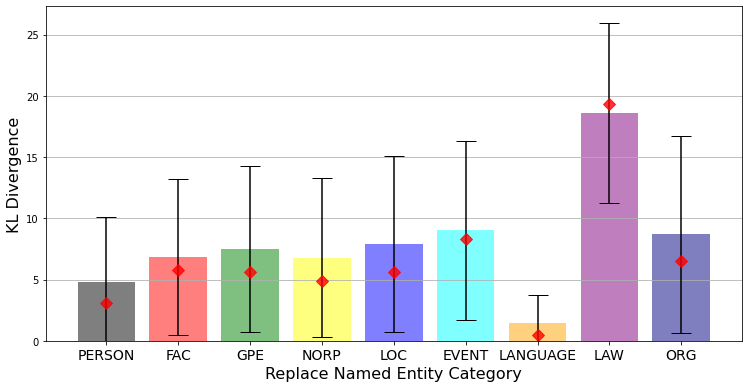

In [49]:
# Build the plot
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5)
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10,
      color=['black', 'red', 'green', 'yellow', 'blue', 'cyan', 'orange', 'purple', 'navy'])

ax.set_ylabel('KL Divergence', fontsize=16)
ax.set_xlabel('Replace Named Entity Category', fontsize=16)

ax.set_xticks(x_pos)
ax.set_xticklabels(x_s, fontsize=14)
ax.yaxis.grid(True)
plt.ylim(bottom=0)

# add median markers
plt.plot(x_pos, medians, marker="D", linestyle="", alpha=0.8, color="red", markersize=8)

# Save the figure and show
plt.tight_layout()
plt.savefig('./vis/kl_mean_std_ner.png')
plt.show()